# Crime / Immigration Analysis

In [1]:
#Import dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import hvplot.pandas




## Read in files

In [2]:
#Read in CSV
states_csv = pd.read_csv('../states.csv')
states_csv.head()



,state,latitude,longitude,name
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama
2,AR,35.201050,-91.831833,Arkansas
3,AZ,34.048928,-111.093731,Arizona
4,CA,36.778261,-119.417932,California


In [3]:
#Read in CSV
crime_data = pd.read_csv('state_crimes.csv')
crime_data.head()

,Year,State,Aggravated Assault,All Other Offenses (Except Traffic),Arson,Burglary,Disorderly Conduct,DUI,Drug Abuse Violations,Embezzlement,...,Murder and Nonnegligent Manslaughter,Offenses Against the Family and Children,Prostitution and Commercialized Vice,Rape,Robbery,Simple Assault,"Stolen Property: Buying, Receiving, Possessing",Vandalism,"Weapons: Carrying, Possessing, Etc.","Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)"
0,2016,AK,1845,11340,51,538,738,3063,1006,81,...,41,195,13,130,282,4300,82,1024,311,281
1,2017,AK,1913,10737,22,623,757,3102,1004,77,...,46,159,5,126,289,4478,105,1004,369,256
2,2018,AK,2132,11072,43,602,843,3148,1046,54,...,38,174,2,149,367,4943,120,1103,387,263
3,2019,AK,2077,10179,49,603,742,2856,930,43,...,46,150,5,129,310,4862,91,1161,259,243
4,2020,AK,2118,9865,42,471,655,3008,808,35,...,33,101,1,160,287,4591,66,1063,332,242


In [4]:
#Read in CSV
census_by_state = pd.read_csv('../census_by_states.csv')
census_by_state.head()



,Unnamed: 0,State,2016 Total Population,2016 Total Migration,2016 Employable Civilians,2016 Employed Civilians,2016 Employed Rate (%),2016 Unemployed Civilians,2016 Median Household Income,2016 Per Capita Income,...,2020 Median Household Income,2020 Per Capita Income,2021 Total Population,2021 Total Migration,2021 Employable Civilians,2021 Employed Civilians,2021 Employed Rate (%),2021 Unemployed Civilians,2021 Median Household Income,2021 Per Capita Income
0,0,Alabama,4841164,108414,2226504,2042025,42,184479,44758,24736,...,52035,28934,4997675,109257,2298013,2173597,43,124416,54943,30458
1,1,Alaska,736855,33458,384093,353954,48,30139,74444,34191,...,77790,37094,735951,29528,363718,338664,46,25054,80287,39236
2,2,Arizona,6728577,245859,3129344,2879372,42,249972,51340,26686,...,61529,32340,7079203,259522,3401906,3210791,45,191115,65913,34644
3,3,Arkansas,2968472,73632,1359742,1266552,42,93190,42336,23401,...,49475,27724,3006309,71002,1384596,1310863,43,73733,52123,29210
4,4,California,38654206,501384,19260868,17577142,45,1683726,63783,31458,...,78672,38576,39455353,478535,19980462,18676721,47,1303741,84097,41276


## Setting up Dataframes

In [5]:
#Migration by Year

#Extract Columns we want

migration_df = census_by_state[["State","2016 Total Migration", "2016 Total Population", "2017 Total Migration", "2017 Total Population",
                            "2018 Total Migration", "2018 Total Population", "2019 Total Migration", "2019 Total Population", 
                             "2020 Total Migration", "2020 Total Population", "2021 Total Migration", "2021 Total Population"]]

migration_df.head()


,State,2016 Total Migration,2016 Total Population,2017 Total Migration,2017 Total Population,2018 Total Migration,2018 Total Population,2019 Total Migration,2019 Total Population,2020 Total Migration,2020 Total Population,2021 Total Migration,2021 Total Population
0,Alabama,108414,4841164,109472,4850771,111675,4864680,112216,4876250,109592,4893186,109257,4997675
1,Alaska,33458,736855,32778,738565,32334,738516,31415,737068,30537,736990,29528,735951
2,Arizona,245859,6728577,251395,6809946,260377,6946685,262076,7050299,268160,7174064,259522,7079203
3,Arkansas,73632,2968472,73591,2977944,74472,2990671,72558,2999370,69322,3011873,71002,3006309
4,California,501384,38654206,507464,38982847,509848,39148760,503560,39283497,492436,39346023,478535,39455353


In [6]:
#Function for merging migration dataframe and states.csv to add state abbreviation column to migration datafram
def new_migration_df(migration_df, states_csv):
    migration_merged = pd.merge(migration_df, states_csv, left_on= "State", right_on= "name", how= "inner")
    drop_columns = ["State", "name"]
    migration_df = migration_merged.drop(columns = drop_columns)
    migration_df = migration_df.sort_values(by= "state", ascending= True)
    return migration_df




migration_df = new_migration_df(migration_df, states_csv)
migration_df


,2016 Total Migration,2016 Total Population,2017 Total Migration,2017 Total Population,2018 Total Migration,2018 Total Population,2019 Total Migration,2019 Total Population,2020 Total Migration,2020 Total Population,2021 Total Migration,2021 Total Population,state,latitude,longitude
1,33458,736855,32778,738565,32334,738516,31415,737068,30537,736990,29528,735951,AK,63.588753,-154.493062
0,108414,4841164,109472,4850771,111675,4864680,112216,4876250,109592,4893186,109257,4997675,AL,32.318231,-86.902298
3,73632,2968472,73591,2977944,74472,2990671,72558,2999370,69322,3011873,71002,3006309,AR,35.201050,-91.831833
2,245859,6728577,251395,6809946,260377,6946685,262076,7050299,268160,7174064,259522,7079203,AZ,34.048928,-111.093731
4,501384,38654206,507464,38982847,509848,39148760,503560,39283497,492436,39346023,478535,39455353,CA,36.778261,-119.417932
5,213586,5359295,217854,5436519,225216,5531141,229779,5610349,226020,5684926,230815,5723176,CO,39.550051,-105.782067
6,80187,3588570,79626,3594478,79460,3581504,81840,3575074,83579,3570549,89780,3605330,CT,41.603221,-73.087749
7,36492,934695,36966,943732,36371,949495,37551,957248,36249,967679,36915,981892,DE,38.910832,-75.527670
8,558705,19934451,564263,20278447,575783,20598139,587748,20901636,598188,21216924,604970,21339762,FL,27.664827,-81.515754
9,282247,10099320,279810,10201635,279999,10297484,282955,10403847,278030,10516579,277486,10625615,GA,32.157435,-82.907123


In [7]:
#Crime by Year

#Extract the data for each year from crime_data dataframe
year16_crime = crime_data[crime_data["Year"]== 2016]
year17_crime = crime_data[crime_data["Year"]== 2017]
year18_crime = crime_data[crime_data["Year"]== 2018]
year19_crime = crime_data[crime_data["Year"]== 2019]
year20_crime = crime_data[crime_data["Year"]== 2020]
year21_crime = crime_data[crime_data["Year"]== 2021]


In [8]:
#Total crimes by year
#Function for calculating total and adding to dataframe
def total_crimes(crime_by_year):
    state = crime_by_year["State"]
    total_crimes = crime_by_year.iloc[:, 2:27].sum(axis =1)
    crime_by_year.loc[:, "Total Crimes"] = total_crimes
    return crime_by_year

#call function for each year and rename to specify year for totals
year16_crime = total_crimes(year16_crime)
year16_crime = year16_crime.rename(columns = {"Total Crimes": "2016 Total Crimes"})

year17_crime = total_crimes(year17_crime)
year17_crime = year17_crime.rename(columns = {"Total Crimes": "2017 Total Crimes"})

year18_crime = total_crimes(year18_crime)
year18_crime = year18_crime.rename(columns = {"Total Crimes": "2018 Total Crimes"})

year19_crime = total_crimes(year19_crime)
year19_crime = year19_crime.rename(columns = {"Total Crimes": "2019 Total Crimes"})

year20_crime = total_crimes(year20_crime)
year20_crime = year20_crime.rename(columns = {"Total Crimes": "2020 Total Crimes"})

year21_crime = total_crimes(year21_crime)
year21_crime = year21_crime.rename(columns = {"Total Crimes": "2021 Total Crimes"})


year17_crime.head()

/var/folders/_2/pb__0xp170l86246l2vwf_6h0000gn/T/ipykernel_78068/1786189415.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_by_year.loc[:, "Total Crimes"] = total_crimes
/var/folders/_2/pb__0xp170l86246l2vwf_6h0000gn/T/ipykernel_78068/1786189415.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_by_year.loc[:, "Total Crimes"] = total_crimes
/var/folders/_2/pb__0xp170l86246l2vwf_6h0000gn/T/ipykernel_78068/1786189415.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,Year,State,Aggravated Assault,All Other Offenses (Except Traffic),Arson,Burglary,Disorderly Conduct,DUI,Drug Abuse Violations,Embezzlement,...,Offenses Against the Family and Children,Prostitution and Commercialized Vice,Rape,Robbery,Simple Assault,"Stolen Property: Buying, Receiving, Possessing",Vandalism,"Weapons: Carrying, Possessing, Etc.","Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)",2017 Total Crimes
1,2017,AK,1913,10737,22,623,757,3102,1004,77,...,159,5,126,289,4478,105,1004,369,256,29109
7,2017,AL,3961,67994,104,2880,1966,7061,10541,152,...,673,2,311,1080,15485,2280,1256,1806,509,139131
13,2017,AR,3848,55402,40,2138,2543,6078,17862,60,...,307,171,304,567,11708,1794,1574,1109,69,119590
19,2017,AZ,10473,84816,232,4251,16661,25300,36156,457,...,3092,308,353,2153,28569,1452,10974,3217,1392,275345
25,2017,CA,88370,290764,1573,38214,3554,123257,212977,997,...,227,7069,2565,16995,80667,17423,16962,28629,9314,1026457


In [9]:
#Merging totals for all years 
year16 = year16_crime[["State", "2016 Total Crimes"]]
year17 = year17_crime[["State", "2017 Total Crimes"]]
year18 = year18_crime[["State", "2018 Total Crimes"]]
year19 = year19_crime[["State", "2019 Total Crimes"]]
year20 = year20_crime[["State", "2020 Total Crimes"]]
year21 = year21_crime[["State", "2021 Total Crimes"]]

crime_totals1 = pd.merge(year16, year17, on = "State", how = "inner")
crime_totals2 = pd.merge(year18, year19, on = "State", how = "inner")
crime_totals3 = pd.merge(year20, year21, on = "State", how = "inner")

crime_totals1_2 = pd.merge(crime_totals1, crime_totals2, on = "State", how = "inner")
crime_totals = pd.merge(crime_totals1_2, crime_totals3, on = "State", how = "inner")
crime_totals.head()


# After inspecting table, and referring back to the API, it looks like for Florida, 
# the FBI does not have some data available, for example for the years 2016 and prior, and has very little data for 2021, dropped Florida


,State,2016 Total Crimes,2017 Total Crimes,2018 Total Crimes,2019 Total Crimes,2020 Total Crimes,2021 Total Crimes
0,AK,29339,29109,30555,27609,26289,10528
1,AL,152030,139131,145556,138255,4024,50172
2,AR,128473,119590,128594,125678,93278,104015
3,AZ,255419,275345,257317,241473,186378,89817
4,CA,1040748,1026457,1026691,983604,807666,79721


In [44]:
#Function for merging crime data with migration data
def merge_migration_and_crime(crime_totals, migration_df):
    crime_migration_df = pd.merge(crime_totals, migration_df, left_on= "State", right_on= "state", how = "inner")
    crime_migration_df = crime_migration_df.drop(columns = "state")
    return crime_migration_df

crime_migration_df = merge_migration_and_crime(crime_totals, migration_df)

crime_migration_df.head(15)


,State,2016 Total Crimes,2017 Total Crimes,2018 Total Crimes,2019 Total Crimes,2020 Total Crimes,2021 Total Crimes,2016 Total Migration,2016 Total Population,2017 Total Migration,...,2018 Total Migration,2018 Total Population,2019 Total Migration,2019 Total Population,2020 Total Migration,2020 Total Population,2021 Total Migration,2021 Total Population,latitude,longitude
0,AK,29339,29109,30555,27609,26289,10528,33458,736855,32778,...,32334,738516,31415,737068,30537,736990,29528,735951,63.588753,-154.493062
1,AL,152030,139131,145556,138255,4024,50172,108414,4841164,109472,...,111675,4864680,112216,4876250,109592,4893186,109257,4997675,32.318231,-86.902298
2,AR,128473,119590,128594,125678,93278,104015,73632,2968472,73591,...,74472,2990671,72558,2999370,69322,3011873,71002,3006309,35.201050,-91.831833
3,AZ,255419,275345,257317,241473,186378,89817,245859,6728577,251395,...,260377,6946685,262076,7050299,268160,7174064,259522,7079203,34.048928,-111.093731
4,CA,1040748,1026457,1026691,983604,807666,79721,501384,38654206,507464,...,509848,39148760,503560,39283497,492436,39346023,478535,39455353,36.778261,-119.417932
5,CO,237842,244131,228290,214362,153826,153824,213586,5359295,217854,...,225216,5531141,229779,5610349,226020,5684926,230815,5723176,39.550051,-105.782067
6,CT,101786,101956,98736,93198,68453,69667,80187,3588570,79626,...,79460,3581504,81840,3575074,83579,3570549,89780,3605330,41.603221,-73.087749
7,DE,32961,30569,28482,29803,24228,24903,36492,934695,36966,...,36371,949495,37551,957248,36249,967679,36915,981892,38.910832,-75.527670
8,GA,273471,262162,256186,128141,114885,155933,282247,10099320,279810,...,279999,10297484,282955,10403847,278030,10516579,277486,10625615,32.157435,-82.907123
9,HI,42045,35459,34389,35329,23128,27329,54503,1413673,52847,...,52472,1422029,51331,1422094,51142,1420074,55232,1453498,19.898682,-155.665857


In [45]:
#Creating a dataframe for crimes and migration by year
total_crime_migration_per_year = {"Year": ["2016", "2017", "2018", "2019", "2020", "2021"],
                            "Total Migration": [crime_migration_df["2016 Total Migration"].sum(), crime_migration_df["2017 Total Migration"].sum(),
                                                crime_migration_df["2018 Total Migration"].sum(), crime_migration_df["2019 Total Migration"].sum(), 
                                                crime_migration_df["2020 Total Migration"].sum(), crime_migration_df["2021 Total Migration"].sum()], 
                            "Total Crimes": [crime_migration_df["2016 Total Crimes"].sum(), crime_migration_df["2017 Total Crimes"].sum(),
                                            crime_migration_df["2018 Total Crimes"].sum(), crime_migration_df["2019 Total Crimes"].sum(), 
                                            crime_migration_df["2020 Total Crimes"].sum(), crime_migration_df["2021 Total Crimes"].sum()]}

total_crime_migration_per_year_df = pd.DataFrame(total_crime_migration_per_year)
total_crime_migration_per_year_df

,Year,Total Migration,Total Crimes
0,2016,6668839,8523713
1,2017,6735784,8328011
2,2018,6812582,8222363
3,2019,6831640,7412284
4,2020,6773942,5319275
5,2021,6838191,4323242


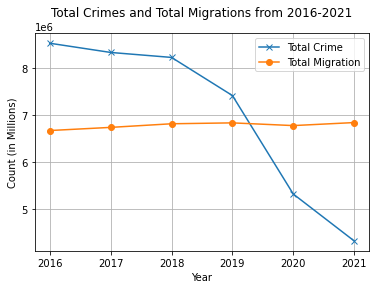

In [46]:
#Line plot over 2016-2021
line_plot1 = total_crime_migration_per_year_df.plot(x= "Year", y= "Total Crimes", marker = "x", label = "Total Crime")
total_crime_migration_per_year_df.plot(x= "Year", y = "Total Migration", marker = "o", ax= line_plot1, label = "Total Migration")
plt.grid(True)
plt.ylabel("Count (in Millions)")
plt.title("Total Crimes and Total Migrations from 2016-2021")

plt.savefig("Output/Migrations_Crimes_Trends.png", bbox_inches="tight")

#Crime decreases
#there is a dip in migration in 2020, possibly from covid pandemic

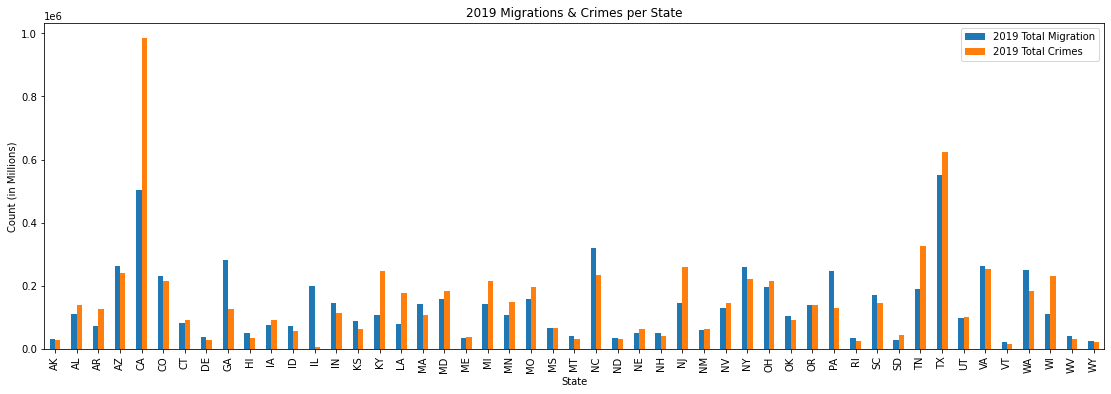

In [13]:
#Most Migration: Year 2019
columns2 = ["2019 Total Migration", "2019 Total Crimes"]

bar_plot1 = crime_migration_df[columns2].plot(kind = "bar", figsize = (19, 6), xlabel = "State", ylabel = "Count (in Millions)", title = "2019 Migrations & Crimes per State")
bar_plot1.set_xticklabels(crime_migration_df["State"])

plt.savefig("Output/2019_Crime_Migration_Bar.png", bbox_inches="tight")

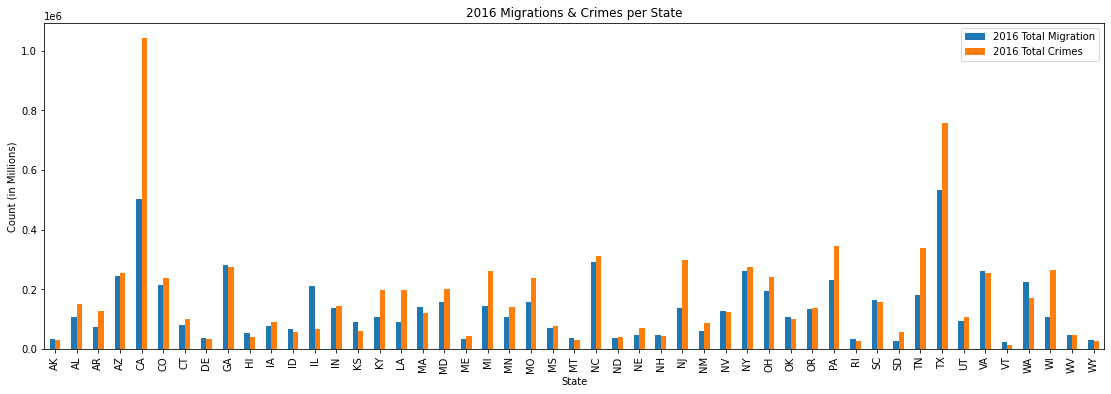

In [14]:
#Most Crime: Year 2016
columns3 = ["2016 Total Migration", "2016 Total Crimes"]

bar_plot2 = crime_migration_df[columns3].plot(kind = "bar", figsize = (19, 6), xlabel = "State", ylabel = "Count (in Millions)", title = "2016 Migrations & Crimes per State")
bar_plot2.set_xticklabels(crime_migration_df["State"])

plt.savefig("Output/2016_Crime_Migration_Bar.png", bbox_inches="tight")

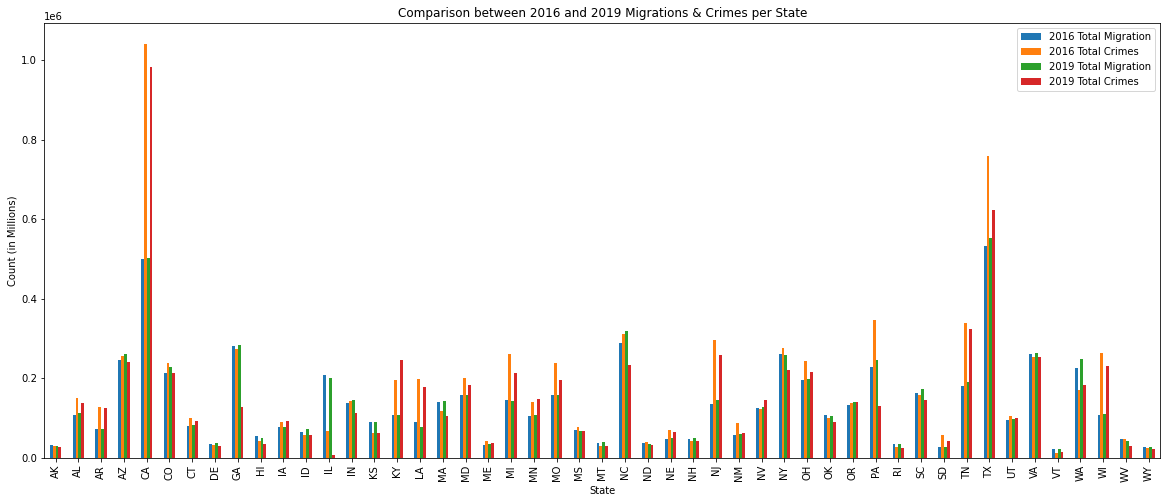

In [15]:
columns4 = ["2016 Total Migration", "2016 Total Crimes", "2019 Total Migration", "2019 Total Crimes"]

bar_plot3 = crime_migration_df[columns4].plot(kind = "bar", figsize = (20, 8), xlabel = "State", ylabel = "Count (in Millions)", title = "Comparison between 2016 and 2019 Migrations & Crimes per State")
bar_plot3.set_xticklabels(crime_migration_df["State"])

plt.savefig("Output/2016_2019_Crime_Migration_Bar_Comparison.png", bbox_inches="tight")

#We see a trend of mostly  crimes decreasing  as migration increases, some states where this is an exception are Iowa, Kentucky. 
#In these states migration stayed consistent between 2016 and 2019, but crime increased. 

In [47]:
#Adding onto the crime_migration_df from calculations
crime_columns = ["2016 Total Crimes", "2017 Total Crimes",
           "2018 Total Crimes", "2019 Total Crimes", 
           "2020 Total Crimes", "2021 Total Crimes"]
migration_columns = ["2016 Total Migration", "2017 Total Migration", 
                     "2018 Total Migration", "2019 Total Migration", 
                     "2020 Total Migration", "2021 Total Migration"]

population_columns = ["2016 Total Population", "2017 Total Population", 
                      "2018 Total Population", "2019 Total Population", 
                      "2020 Total Population", "2021 Total Population"]

#getting sums 
total_crimes = crime_migration_df[crime_columns].sum(axis =1)
total_migration = crime_migration_df[migration_columns].sum(axis =1)
total_population = crime_migration_df[population_columns].sum(axis =1)

#adding to dataframe
crime_migration_df["Total Crimes"] = total_crimes
crime_migration_df["Total Migration"] = total_migration
crime_migration_df["Average Population"] = total_population/6


crime_migration_df.head()

,State,2016 Total Crimes,2017 Total Crimes,2018 Total Crimes,2019 Total Crimes,2020 Total Crimes,2021 Total Crimes,2016 Total Migration,2016 Total Population,2017 Total Migration,...,2019 Total Population,2020 Total Migration,2020 Total Population,2021 Total Migration,2021 Total Population,latitude,longitude,Total Crimes,Total Migration,Average Population
0,AK,29339,29109,30555,27609,26289,10528,33458,736855,32778,...,737068,30537,736990,29528,735951,63.588753,-154.493062,153429,190050,7.373242e+05
1,AL,152030,139131,145556,138255,4024,50172,108414,4841164,109472,...,4876250,109592,4893186,109257,4997675,32.318231,-86.902298,629168,660626,4.887288e+06
2,AR,128473,119590,128594,125678,93278,104015,73632,2968472,73591,...,2999370,69322,3011873,71002,3006309,35.201050,-91.831833,699628,434577,2.992440e+06
3,AZ,255419,275345,257317,241473,186378,89817,245859,6728577,251395,...,7050299,268160,7174064,259522,7079203,34.048928,-111.093731,1305749,1547389,6.964796e+06
4,CA,1040748,1026457,1026691,983604,807666,79721,501384,38654206,507464,...,39283497,492436,39346023,478535,39455353,36.778261,-119.417932,4964887,2993227,3.914511e+07


In [48]:
#Normalizing data to plot using hvplot

scaling_factor = 10
crime_df_log = np.log1p(crime_migration_df['Total Crimes'])
crime_migration_df['Total Crimes (Scaled)'] = crime_df_log * scaling_factor

migration_df_log = np.log1p(crime_migration_df['Total Migration'])
crime_migration_df['Total Migration (Scaled)'] = migration_df_log * scaling_factor



crime_migration_df.head()

,State,2016 Total Crimes,2017 Total Crimes,2018 Total Crimes,2019 Total Crimes,2020 Total Crimes,2021 Total Crimes,2016 Total Migration,2016 Total Population,2017 Total Migration,...,2020 Total Population,2021 Total Migration,2021 Total Population,latitude,longitude,Total Crimes,Total Migration,Average Population,Total Crimes (Scaled),Total Migration (Scaled)
0,AK,29339,29109,30555,27609,26289,10528,33458,736855,32778,...,736990,29528,735951,63.588753,-154.493062,153429,190050,7.373242e+05,119.409997,121.550477
1,AL,152030,139131,145556,138255,4024,50172,108414,4841164,109472,...,4893186,109257,4997675,32.318231,-86.902298,629168,660626,4.887288e+06,133.521552,134.009447
2,AR,128473,119590,128594,125678,93278,104015,73632,2968472,73591,...,3011873,71002,3006309,35.201050,-91.831833,699628,434577,2.992440e+06,134.583055,129.821307
3,AZ,255419,275345,257317,241473,186378,89817,245859,6728577,251395,...,7174064,259522,7079203,34.048928,-111.093731,1305749,1547389,6.964796e+06,140.822881,142.520802
4,CA,1040748,1026457,1026691,983604,807666,79721,501384,38654206,507464,...,39346023,478535,39455353,36.778261,-119.417932,4964887,2993227,3.914511e+07,154.179013,149.118630


In [49]:
#Total Crimes per State

crime_state_plot = crime_migration_df.hvplot.points("longitude", "latitude", 
                                                        geo = True, 
                                                        tiles = "OSM", 
                                                        color = "State", 
                                                        size = "Total Crimes (Scaled)", 
                                                        color_key = "Set3", 
                                                        line_color = "k",
                                                        hover_cols = ["Total Crimes", "Total Migration"] 
                                                        )

crime_state_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (State,Total Crimes (Scaled),Total Crimes,Total Migration)

In [50]:
#Calculations to add to dataframe

#Rate of migration per State Population
migration_rate = ((crime_migration_df["Total Migration"])/6)/crime_migration_df["Average Population"]
migration_rate
#crime_rate
crime_rate = (((crime_migration_df["Total Crimes"])/6)/crime_migration_df["Average Population"])
crime_rate = crime_rate * 1000
#crime rate per people moving in/out of the state over 6 years
crime_per_migration_6years = ((crime_migration_df["Total Crimes"]/crime_migration_df["Total Migration"]))
crime_per_migration_6years = crime_per_migration_6years * 100

#Average crime per Average Migration for each state over 6 year period
crime_migration_df["Crime per Migration (%)"] = crime_per_migration_6years
#Average crime per Average Populationof each state over 6 year period
crime_migration_df["Average Crime per Population (%)"] = crime_rate
crime_migration_df.head()




,State,2016 Total Crimes,2017 Total Crimes,2018 Total Crimes,2019 Total Crimes,2020 Total Crimes,2021 Total Crimes,2016 Total Migration,2016 Total Population,2017 Total Migration,...,2021 Total Population,latitude,longitude,Total Crimes,Total Migration,Average Population,Total Crimes (Scaled),Total Migration (Scaled),Crime per Migration (%),Average Crime per Population (%)
0,AK,29339,29109,30555,27609,26289,10528,33458,736855,32778,...,735951,63.588753,-154.493062,153429,190050,7.373242e+05,119.409997,121.550477,80.730860,34.681489
1,AL,152030,139131,145556,138255,4024,50172,108414,4841164,109472,...,4997675,32.318231,-86.902298,629168,660626,4.887288e+06,133.521552,134.009447,95.238153,21.455936
2,AR,128473,119590,128594,125678,93278,104015,73632,2968472,73591,...,3006309,35.201050,-91.831833,699628,434577,2.992440e+06,134.583055,129.821307,160.990572,38.966420
3,AZ,255419,275345,257317,241473,186378,89817,245859,6728577,251395,...,7079203,34.048928,-111.093731,1305749,1547389,6.964796e+06,140.822881,142.520802,84.384017,31.246406
4,CA,1040748,1026457,1026691,983604,807666,79721,501384,38654206,507464,...,39455353,36.778261,-119.417932,4964887,2993227,3.914511e+07,154.179013,149.118630,165.870714,21.138811


In [51]:
#Add Average Crimes over 6 year period for each state
average_crime = (crime_migration_df["Total Crimes"])/6
crime_migration_df["Average Crimes"] = average_crime
crime_migration_df.head()

,State,2016 Total Crimes,2017 Total Crimes,2018 Total Crimes,2019 Total Crimes,2020 Total Crimes,2021 Total Crimes,2016 Total Migration,2016 Total Population,2017 Total Migration,...,latitude,longitude,Total Crimes,Total Migration,Average Population,Total Crimes (Scaled),Total Migration (Scaled),Crime per Migration (%),Average Crime per Population (%),Average Crimes
0,AK,29339,29109,30555,27609,26289,10528,33458,736855,32778,...,63.588753,-154.493062,153429,190050,7.373242e+05,119.409997,121.550477,80.730860,34.681489,25571.500000
1,AL,152030,139131,145556,138255,4024,50172,108414,4841164,109472,...,32.318231,-86.902298,629168,660626,4.887288e+06,133.521552,134.009447,95.238153,21.455936,104861.333333
2,AR,128473,119590,128594,125678,93278,104015,73632,2968472,73591,...,35.201050,-91.831833,699628,434577,2.992440e+06,134.583055,129.821307,160.990572,38.966420,116604.666667
3,AZ,255419,275345,257317,241473,186378,89817,245859,6728577,251395,...,34.048928,-111.093731,1305749,1547389,6.964796e+06,140.822881,142.520802,84.384017,31.246406,217624.833333
4,CA,1040748,1026457,1026691,983604,807666,79721,501384,38654206,507464,...,36.778261,-119.417932,4964887,2993227,3.914511e+07,154.179013,149.118630,165.870714,21.138811,827481.166667


In [52]:
#Average Crime per Population (%)
crime_population_state_plot = crime_migration_df.hvplot.points("longitude", "latitude", 
                                                        geo = True, 
                                                        tiles = "OSM", 
                                                        color = "State", 
                                                        size = "Average Crime per Population (%)", 
                                                        color_key = "Set3", 
                                                        line_color = "k",
                                                        hover_cols = ["Average Crimes", "Average Population"])

crime_population_state_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (State,Average Crime per Population (%),Average Crimes,Average Population)

In [53]:

#Crime per Migration (%)

crime_migration_state_plot = crime_migration_df.hvplot.points("longitude", "latitude", 
                                                        geo = True, 
                                                        tiles = "OSM", 
                                                        color = "State", 
                                                        size = "Crime per Migration (%)", 
                                                        color_key = "Set3", 
                                                        line_color = "k",
                                                        hover_cols = ["Total Crimes", "Total Migration"])

crime_migration_state_plot


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (State,Crime per Migration (%),Total Crimes,Total Migration)

## Regressions/Correlations

In [76]:
# Define a function to create Linear Regression plots
def lin_regress(x,y):
    correlation = st.pearsonr(x, y)
    print(f"The correlation between the two factors is {round(correlation[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y, color = "darkblue")
    plt.plot(x,regress_values, "g-")
    plt.annotate(line_eq, xy=(-0.5, 0.5), xycoords='axes points', color = "red")
    print(f"The pvalue is: {pvalue} and the standard error is {stderr}")
    return line_eq

The correlation between the two factors is 0.89
The pvalue is: 1.1178148100536944e-17 and the standard error is 0.08655811763480652


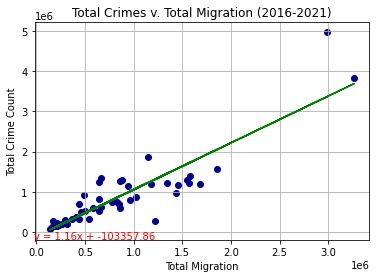

In [77]:
lin_regress_all_years = lin_regress(crime_migration_df["Total Migration"], crime_migration_df["Total Crimes"])
plt.xlabel("Total Migration")
plt.ylabel("Total Crime Count")
plt.title("Total Crimes v. Total Migration (2016-2021)")
plt.grid()
plt.savefig("Output/2016-2021_Crime_v_Migration.png")
#There is a weak negative correlation

The correlation between the two factors is 0.9
The pvalue is: 1.984530867429194e-18 and the standard error is 0.10568142188199026


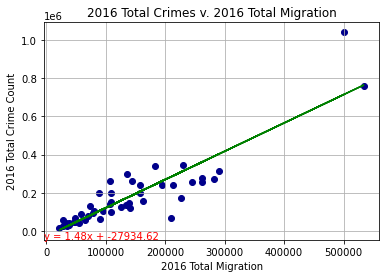

In [78]:
lin_regress_2016 = lin_regress(crime_migration_df["2016 Total Migration"], crime_migration_df["2016 Total Crimes"])
plt.xlabel("2016 Total Migration")
plt.ylabel("2016 Total Crime Count")
plt.title("2016 Total Crimes v. 2016 Total Migration")
plt.grid()
plt.savefig("Output/2016_Crime_v_Migration.png")

The correlation between the two factors is 0.9
The pvalue is: 2.2359540026606426e-18 and the standard error is 0.10258148649233788


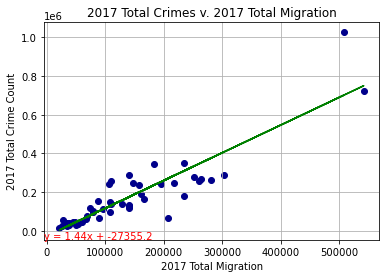

In [79]:
lin_regress_2017 = lin_regress(crime_migration_df["2017 Total Migration"], crime_migration_df["2017 Total Crimes"])
plt.xlabel("2017 Total Migration")
plt.ylabel("2017 Total Crime Count")
plt.title("2017 Total Crimes v. 2017 Total Migration")
plt.grid()
plt.savefig("Output/2017_Crime_v_Migration.png")

The correlation between the two factors is 0.9
The pvalue is: 3.410012125918207e-18 and the standard error is 0.10120710786075955


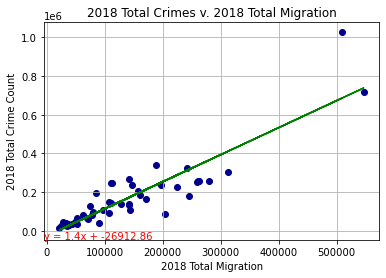

In [80]:
lin_regress_2018 = lin_regress(crime_migration_df["2018 Total Migration"], crime_migration_df["2018 Total Crimes"])
plt.xlabel("2018 Total Migration")
plt.ylabel("2018 Total Crime Count")
plt.title("2018 Total Crimes v. 2018 Total Migration")
plt.grid()
plt.savefig("Output/2018_Crime_v_Migration.png")

The correlation between the two factors is 0.83
The pvalue is: 9.631747003313216e-14 and the standard error is 0.1150301570595705


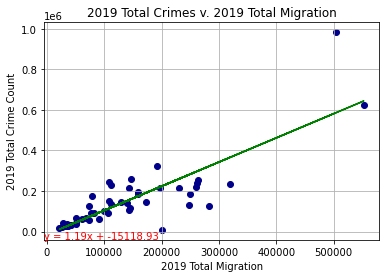

In [81]:
lin_regress_2019 = lin_regress(crime_migration_df["2019 Total Migration"], crime_migration_df["2019 Total Crimes"])
plt.xlabel("2019 Total Migration")
plt.ylabel("2019 Total Crime Count")
plt.title("2019 Total Crimes v. 2019 Total Migration")
plt.grid()
plt.savefig("Output/2019_Crime_v_Migration.png")

The correlation between the two factors is 0.8
The pvalue is: 6.4662115763218914e-12 and the standard error is 0.10343854475991825


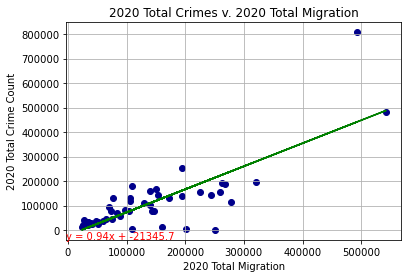

In [82]:
lin_regress_2020 = lin_regress(crime_migration_df["2020 Total Migration"], crime_migration_df["2020 Total Crimes"])
plt.xlabel("2020 Total Migration")
plt.ylabel("2020 Total Crime Count")
plt.title("2020 Total Crimes v. 2020 Total Migration")
plt.grid()
plt.savefig("Output/2020_Crime_v_Migration.png", bbox_inches="tight")

The correlation between the two factors is 0.68
The pvalue is: 6.969969971466649e-08 and the standard error is 0.08272240263232443


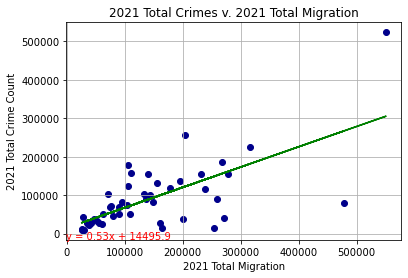

In [83]:
lin_regress_2021 = lin_regress(crime_migration_df["2021 Total Migration"], crime_migration_df["2021 Total Crimes"])
plt.xlabel("2021 Total Migration")
plt.ylabel("2021 Total Crime Count")
plt.title("2021 Total Crimes v. 2021 Total Migration")
plt.grid()

plt.savefig("Output/2021_Crime_v_Migration.png", bbox_inches="tight")

## Human Trafficking 
- In depth look into see if human trafficking is correlated with migration within the States. 

In [84]:
#Human trafficking 
ht= crime_data.groupby("State")["Human Trafficking - Commercial Sex Acts"].sum()
ht_state = crime_data["State"]
trafficking_df = pd.merge(ht, ht_state, on = "State", how = "right")
trafficking_df.drop_duplicates()
trafficking_df.head()

,State,Human Trafficking - Commercial Sex Acts
0,AK,1
1,AK,1
2,AK,1
3,AK,1
4,AK,1


In [85]:
ht_crime_migration_df = crime_migration_df[["State", "Total Migration", "latitude", "longitude"]]
ht_df= pd.merge(trafficking_df, ht_crime_migration_df, on = "State", how = "inner")
ht_df = ht_df.drop_duplicates()
ht_df.head()


,State,Human Trafficking - Commercial Sex Acts,Total Migration,latitude,longitude
0,AK,1,190050,63.588753,-154.493062
6,AL,7,660626,32.318231,-86.902298
12,AR,1,434577,35.201050,-91.831833
18,AZ,251,1547389,34.048928,-111.093731
24,CA,0,2993227,36.778261,-119.417932


The correlation between the two factors is 0.26
The pvalue is: 0.06889181550668205 and the standard error is 1.6887112829307078e-05


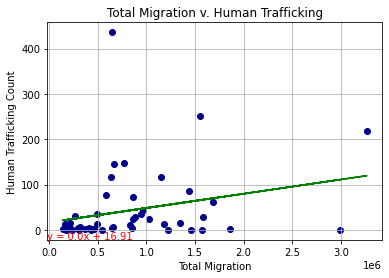

In [86]:
lin_regress_2021 = lin_regress(ht_df["Total Migration"], ht_df["Human Trafficking - Commercial Sex Acts"])
plt.xlabel("Total Migration")
plt.ylabel("Human Trafficking Count")
plt.title("Total Migration v. Human Trafficking")
plt.grid()

plt.savefig("Output/Trafficking_v_Migration.png", bbox_inches="tight")

#Weak positive correlation 

In [281]:
#Human Trafficking in the States between 2016-2021
ht_plot = ht_df.hvplot.points("longitude", "latitude", 
                                geo = True, 
                                tiles = "OSM", 
                                color = "State", 
                                size = "Human Trafficking - Commercial Sex Acts", 
                                color_key = "Set3", 
                                line_color = "k",
                                hover_cols = ["Human Trafficking - Commercial Sex Acts", "Total Migration"])

ht_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (State,Human Trafficking - Commercial Sex Acts,Total Migration)